# MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [3]:
images, labels = mnist.train.next_batch(10)

In [4]:
print(images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

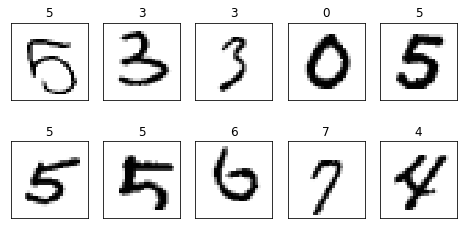

In [5]:
fig = plt.figure(figsize=(8, 4))
for c, (image, label) in enumerate(zip(images, labels)):
    subplot = fig.add_subplot(2, 5, c + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')

# MNIST classification

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160604)

In [7]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [8]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

In [9]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [10]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [12]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x: mnist.test.images, t: mnist.test.labels})
        print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 100, Loss: 7566.380859, Accuracy: 0.848000
Step: 200, Loss: 5378.829590, Accuracy: 0.877100
Step: 300, Loss: 4547.976562, Accuracy: 0.889000
Step: 400, Loss: 4074.163818, Accuracy: 0.898400
Step: 500, Loss: 3783.052490, Accuracy: 0.902900
Step: 600, Loss: 3571.839844, Accuracy: 0.908300
Step: 700, Loss: 3452.153809, Accuracy: 0.908800
Step: 800, Loss: 3356.995605, Accuracy: 0.908400
Step: 900, Loss: 3247.895996, Accuracy: 0.913100
Step: 1000, Loss: 3194.339844, Accuracy: 0.913200
Step: 1100, Loss: 3124.511230, Accuracy: 0.915200
Step: 1200, Loss: 3097.986572, Accuracy: 0.914900
Step: 1300, Loss: 3038.270996, Accuracy: 0.915200
Step: 1400, Loss: 2995.742676, Accuracy: 0.916500
Step: 1500, Loss: 2976.861816, Accuracy: 0.919000
Step: 1600, Loss: 2929.816406, Accuracy: 0.918200
Step: 1700, Loss: 2893.628418, Accuracy: 0.919700
Step: 1800, Loss: 2873.043457, Accuracy: 0.921100
Step: 1900, Loss: 2849.377686, Accuracy: 0.921900
Step: 2000, Loss: 2843.618164, Accuracy: 0.921200


In [13]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x: images, t: labels})

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != 1:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10, 6, i * 6 + c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
            c += 1
            if c > 6:
                break

NameError: name 'reshape' is not defined